# GGR274 Lab 5: Data Transformations, Grouped Data, and Data Visualization

## Logistics

Like last week, our lab grade will be based on attendance and submission of a few small tasks to MarkUs during the lab session (or by 23:59 on Thursday).

Complete the tasks in this Jupyter notebook and submit your completed file to [MarkUs](https://markus-ds.teach.cs.toronto.edu).
Here are the instructions for submitting to MarkUs (same as last week):

1. Download this file (`Lab_5.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **lab5** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)

Note: there's no autograding set up for this week's lab, but your TA will be checking that your submitted lab file is complete as part of your "lab attendance" grade.

## Lab 5 Introduction

In this lab, you will work with  a data set called `time_use_prov`. This is a data set is derived from the Statistics Canada General Social Survey's (GSS) Time Use (TU) Survey Main File, as well as a data set containing information on aggregated provincial data. This week you will plot box plots, bar graphs, and use the logical operators from Week 4 material to develop subset data sets to visualize data on.

As usual, these labs are meant to facilitate your understanding of the material from lectures in a low-stakes environment. Please feel free to refer to your lecture content, collaborate with your peers, and seek out help from your TAs.

## Task 1

Read CSV file `'time_use_prov.csv'` into a pandas `DataFrame` named `prov_data`.

In [1]:
import pandas as pd

prov_data = pd.read_csv('time_use_prov.csv')

prov_data.head()

,Unnamed: 0,Participant ID,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Prov_ab,Employment Rate,Pct house over 30,region,Income
0,0,10000,1,5,5,1,0,1,510,0,MB,61.7,11.4,Prairies,68147.0
1,1,10009,1,6,3,1,0,6,540,0,MB,61.7,11.4,Prairies,68147.0
2,2,10016,2,7,1,1,0,6,660,0,MB,61.7,11.4,Prairies,68147.0
3,3,10023,1,6,1,2,0,3,330,0,MB,61.7,11.4,Prairies,68147.0
4,4,10047,2,7,1,1,0,3,510,0,MB,61.7,11.4,Prairies,68147.0


## Task 2

a) Create a new column in `prov_data` named `'age_bin'`.  The values of `'age_bin'` should be obtained from the `'age'` column in `prov_data` which has the values:

```
            Age group of respondent (groups of 10)

           VALUE  LABEL
               1  15 to 24 years
               2  25 to 34 years
               3  35 to 44 years
               4  45 to 54 years
               5  55 to 64 years
               6  65 to 74 years
               7  75 years and over
              96  Valid skip
              97  Don't know
              98  Refusal
              99  Not stated
```

`'age_bin'` should have the values `'youth'`, `'young'`, `'middle'`, `'senior'` defined as :

- `'youth'`  : ages 15-24
- `'young'`  : ages 25-44
- `'middle'` : ages 45-64
- `'senior'` : ages 65+

In [2]:
# Solution

age = prov_data['Age Group']

youth = (age == 1)
young = (age == 2) | (age == 3)
middle = (age == 4) | (age == 5)
senior = (age == 6) | (age == 7)

prov_data.loc[youth, 'age_bin'] = 'youth'
prov_data.loc[young, 'age_bin'] = 'young'
prov_data.loc[middle, 'age_bin'] = 'middle'
prov_data.loc[senior, 'age_bin'] = 'senior'

b) Compute the distribution of `age_bin` as a count, and store this in `age_bin_count_dist`. Then compute `age_bin` as a proportion of the total population, and store this in `age_bin_prop_dist`.

In [3]:
age_bin_count_dist = prov_data['age_bin'].value_counts()

age_bin_count_dist

age_bin
middle    6530
senior    4833
young     4724
youth     1303
Name: count, dtype: int64

In [9]:
age_bin_prop_dist = age_bin_count_dist / age_bin_count_dist.sum()

age_bin_prop_dist

age_bin
middle    0.375503
senior    0.277918
young     0.271650
youth     0.074928
Name: count, dtype: float64

c) Sort the values of `age_bin_prop_dist` in ascending order (smallest to largest) using the `sort_values` method.  The code is

```python
age_bin_prop_dist.sort_values(ascending = True, inplace = True)
```

The `inplace = True` parameter in `sort_values` modifies `age_bin_prop_dist`.  What do you predict would happen to `age_bin_prop_dist` if we used `age_bin_prop_dist.sort_values(ascending=True, inplace = False)` instead?

In [10]:
age_bin_prop_dist.sort_values(ascending = True, inplace = True)

age_bin_prop_dist

age_bin
youth     0.074928
young     0.271650
senior    0.277918
middle    0.375503
Name: count, dtype: float64

c) Create a bar plot of `age_bin_prop_dist`. 

_Feel free to explore different aesthetic options by changing paramters for the plotting function. (See the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html).)_

<Axes: title={'center': 'Distribution of age groups'}>

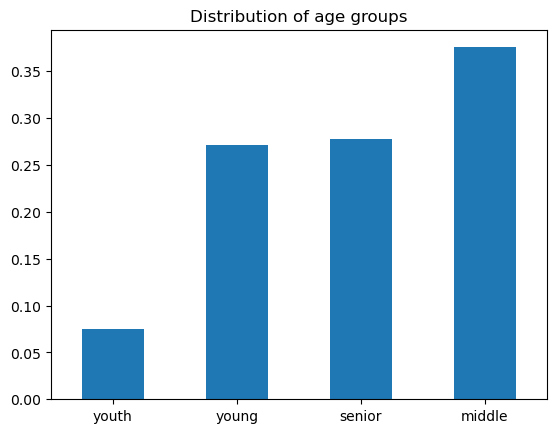

In [11]:
age_bin_prop_dist.plot.bar()
age_bin_prop_dist.plot.bar(
    rot = 0, 
    title = 'Distribution of age groups', 
    xlabel = ''
)

## Task 3

a) Create a boxplot of `Sleep duration` by `age_bin`.  Store this plot in `sleep_by_age_boxplots`.  Use `figsize = (8, 8)` in the `pandas.DataFrame.boxplot` function. 

b) Set the label on the y-axis (vertical axis) to `Sleep duration` by using the `.set_ylabel()` method, as follows:

```python
sleep_by_age_boxplots.set_ylabel('Sleep duration')
```

_Feel free to customize the plot further to your liking with the help of the [documention](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)._

Text(0, 0.5, 'Sleep duration')

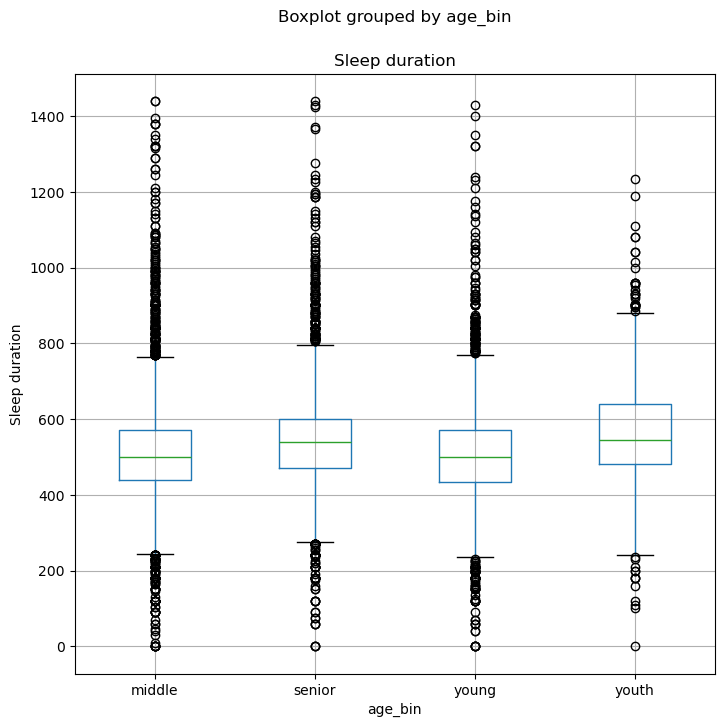

In [12]:
sleep_by_age_boxplots = prov_data.boxplot(
    column = 'Sleep duration', 
    by = 'age_bin', 
    figsize = (8,8)
);

sleep_by_age_boxplots.set_ylabel('Sleep duration')

Further customization. See [documentation on `pandas.Categorical`](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html) for more information on the method.

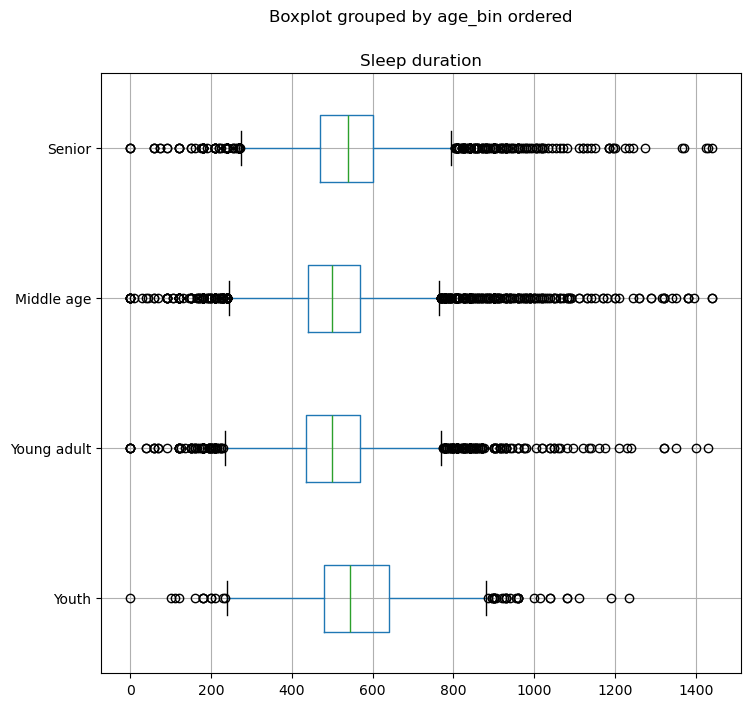

In [13]:
prov_data['age_bin ordered'] = pd.Categorical(
    prov_data['age_bin'],
    categories = [
        'youth',
        'young',
        'middle',
        'senior'
    ],
    ordered = True
)

sleep_by_age_boxplots = prov_data.boxplot(
    column = 'Sleep duration', 
    by = 'age_bin ordered', 
    figsize = (8,8),
    vert = False
);

sleep_by_age_boxplots.set_xlabel('');
sleep_by_age_boxplots.set_ylabel('');
sleep_by_age_boxplots.set_yticklabels([
    'Youth',
    'Young adult',
    'Middle age',
    'Senior'
]);